## Miniproject 2: MovieLens Visualization



### Download data

In [75]:
import requests

url_dict = {
     'data.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/data.csv',
     'movies.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/movies.csv',
     'train.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/train.csv',
     'test.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/test.csv'
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

download_file('data.csv')
download_file('movies.csv')
download_file('train.csv')
download_file('test.csv')

Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete


In [90]:
display(data)

,User ID,Movie ID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [76]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')
movies = pd.read_csv('movies.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Off the Shelf Software: Surprise

In [77]:
!pip install surprise

In [78]:
from surprise import Dataset, Reader
from surprise import SVD, accuracy
from surprise.model_selection import train_test_split, cross_validate
import numpy as np

In [89]:
# Dataset reader
reader = Reader()

# Prepare training dataset
trainset = Dataset.load_from_df(train, reader)
trainset = trainset.build_full_trainset()

# Prepare testing dataset
testset = [test.loc[i].to_list() for i in range(len(test))]

# SVD model
model = SVD(n_epochs=300, n_factors=20, lr_all=0.05, reg_all=0.1, biased=False)

# Train
model.fit(trainset)

# Test
predictions = model.test(testset)

# Error
accuracy.mse(predictions)

MSE: 0.9664


0.9664157612019871

In [80]:
def get_projections(U, V):
  A, Sigma, B = np.linalg.svd(V.T)
  U_tilde = np.matmul(A[:, :2].T, U.T)
  V_tilde = np.matmul(A[:, :2].T, V.T)
  return U_tilde, V_tilde

In [82]:
U = model.pu
V = model.qi

U_tilde_3, V_tilde_3 = get_projections(U, V)

In [87]:
def plot_visualizations(movie_ids, plot_title, V_tilde):
    plt.figure(figsize=(10, 10))
    movie_idxs = [id - 1 for id in movie_ids]
    movie_coords = V_tilde[:, movie_idxs]
    movie_titles = np.array(movies['Movie Title'][movie_idxs])
    plt.scatter(movie_coords[0], movie_coords[1], s=50, c=avg_ratings[movie_idxs], cmap='RdYlGn')
    plt.colorbar().set_label("Average Rating")
    plt.xlabel('Factor Vector 1')
    plt.ylabel('Factor Vector 2')
    plt.title(plot_title)
    for i in range(len(movie_titles)):
        plt.annotate(movie_titles[i], (movie_coords[0][i], movie_coords[1][i]), horizontalalignment='center', verticalalignment='bottom', fontsize=8, xytext=(0, 5), textcoords='offset points')
    plt.show()

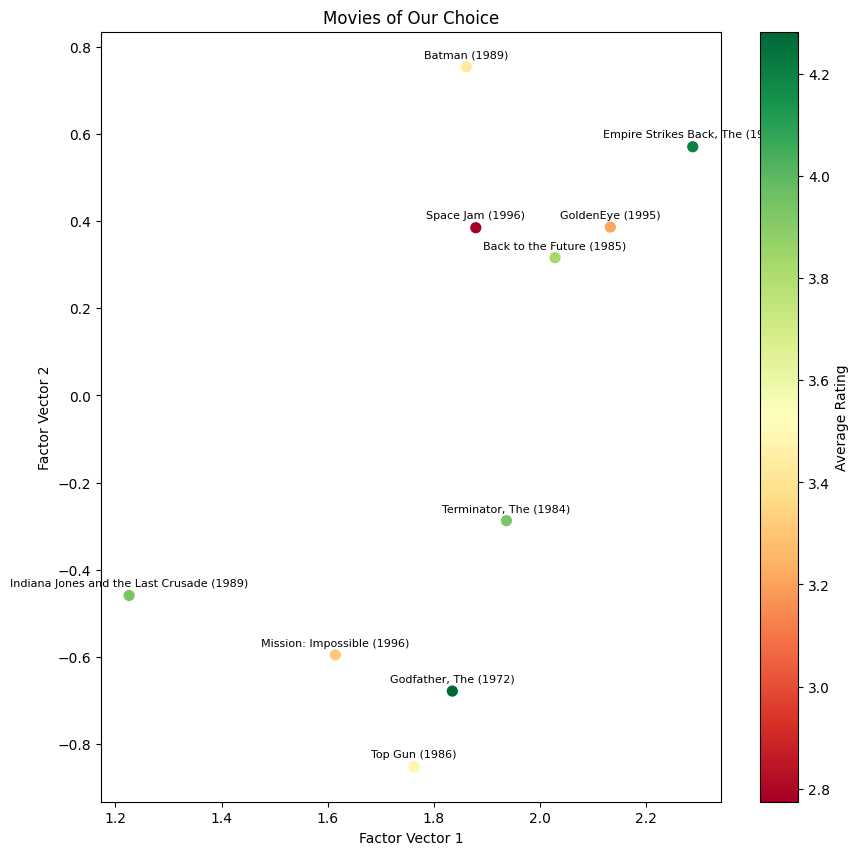

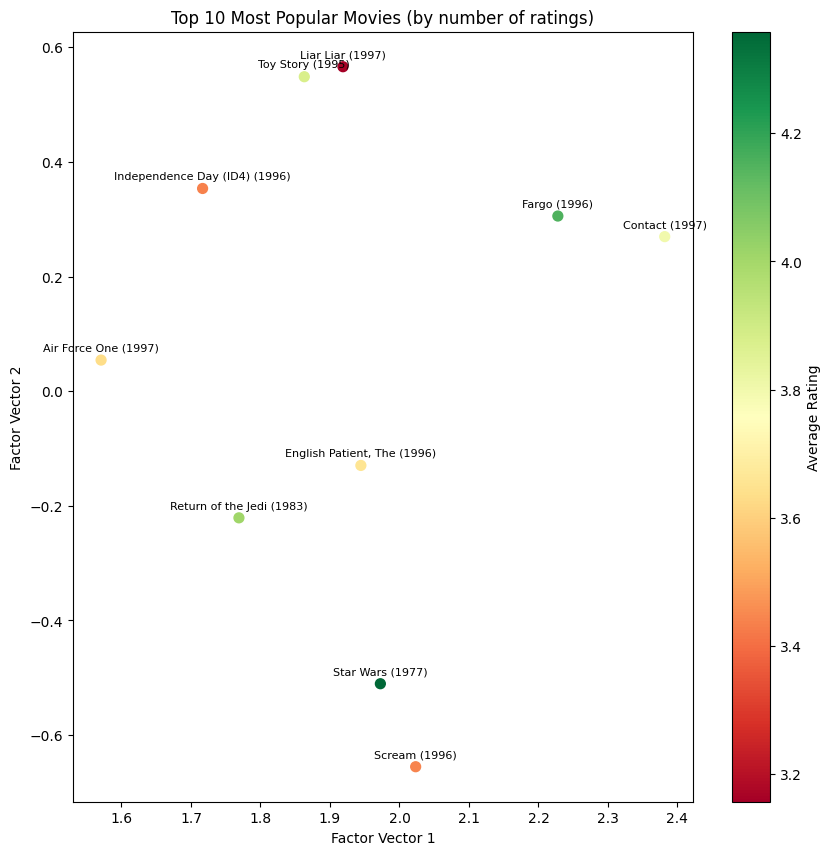

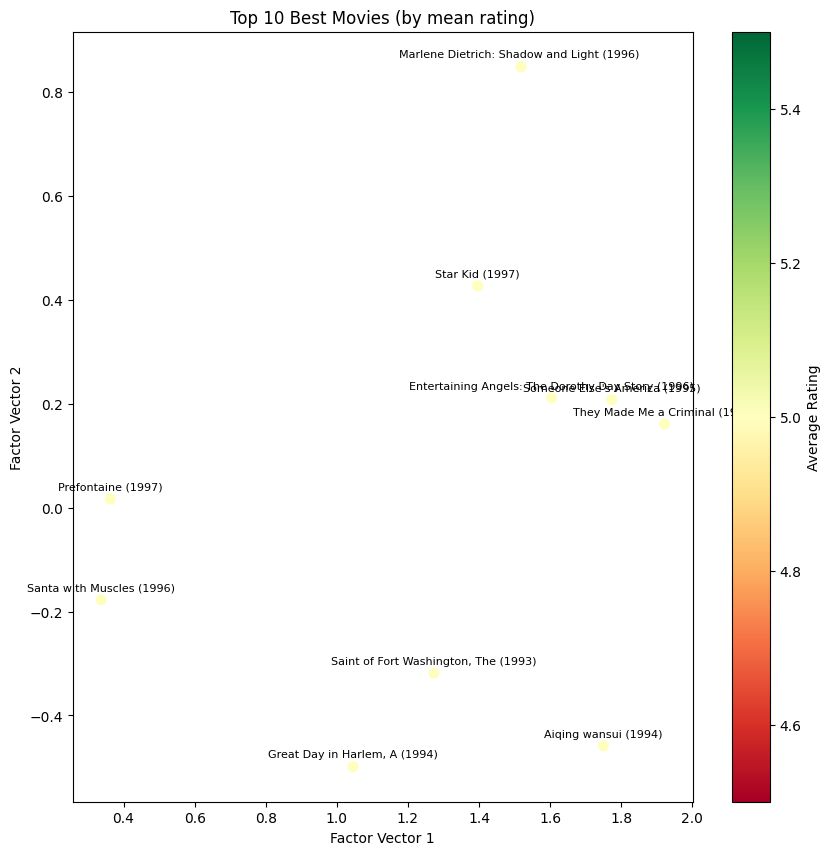

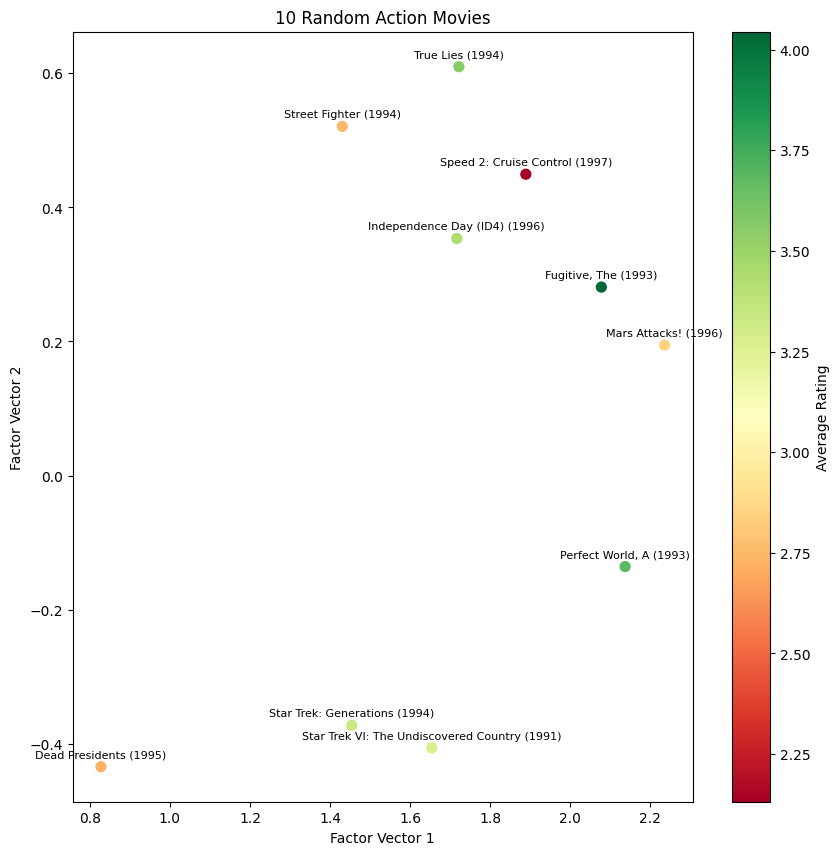

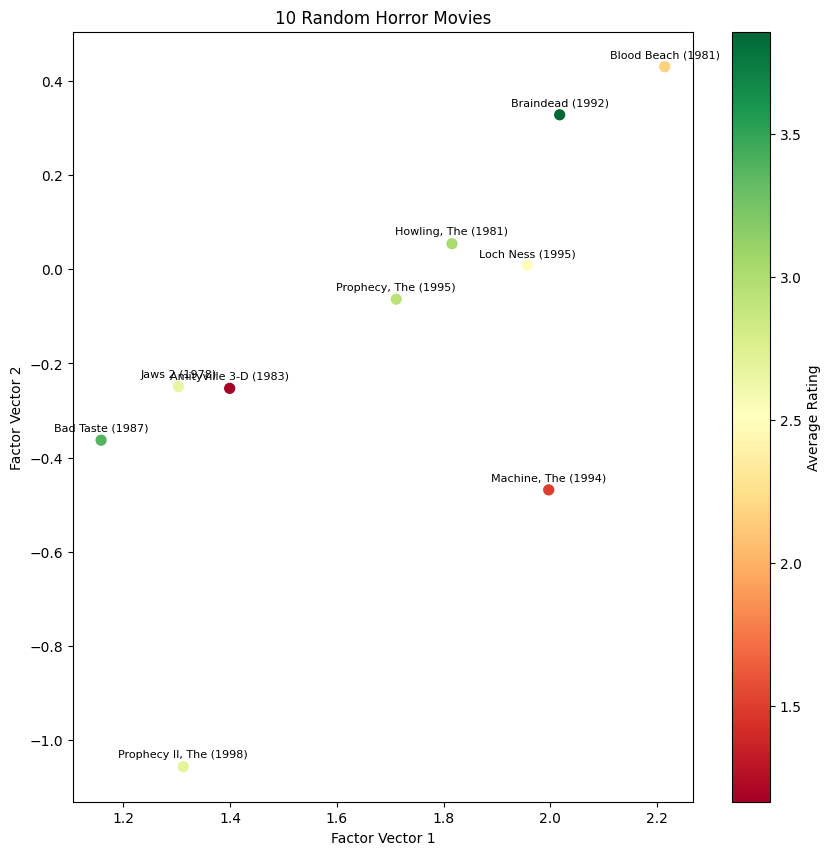

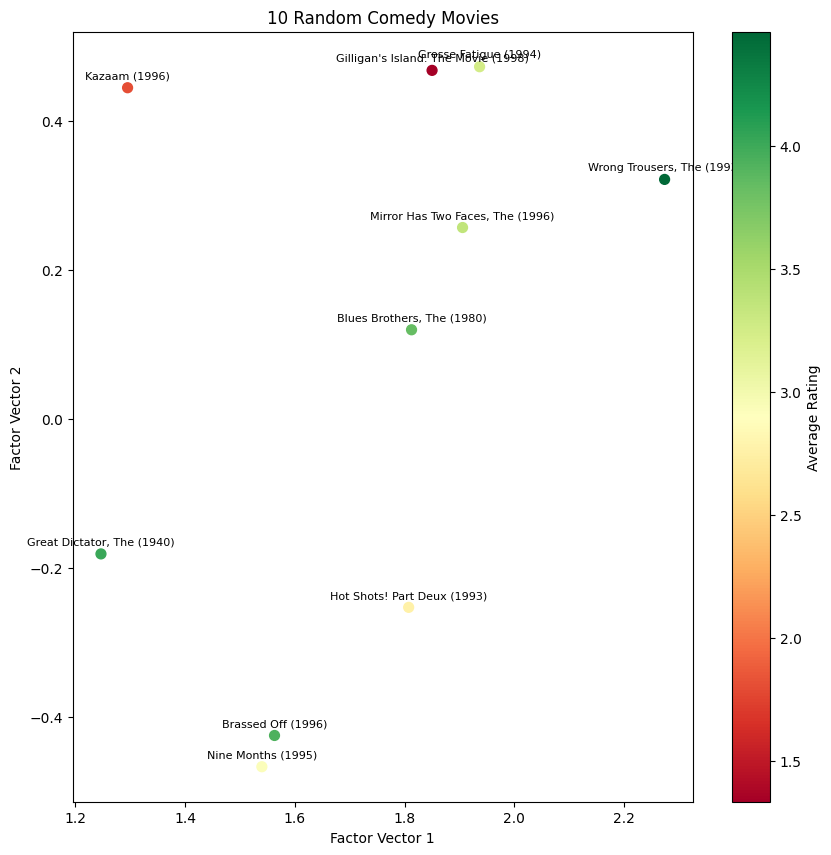

In [88]:
avg_ratings = np.array(data[['Movie ID', 'Rating']].groupby('Movie ID').mean().sort_values('Movie ID'))

chosen_ids = np.array([2, 127, 195, 210, 161, 204, 172, 403, 405, 820])
plot_visualizations(chosen_ids, 'Movies of Our Choice', V_tilde_3)

most_popular_ids = np.array(data['Movie ID'].value_counts().head(10).index)
plot_visualizations(most_popular_ids, 'Top 10 Most Popular Movies (by number of ratings)', V_tilde_3)

best_ids = np.array(data[['Movie ID', 'Rating']].groupby('Movie ID').mean().sort_values('Rating', ascending=False).head(10).index)
plot_visualizations(best_ids, 'Top 10 Best Movies (by mean rating)', V_tilde_3)

action_ids = np.array(movies[movies['Action']==1]['Movie ID'])
plot_visualizations(np.random.choice(action_ids, size=10, replace=False), '10 Random Action Movies', V_tilde_3)

horror_ids = np.array(movies[movies['Horror']==1]['Movie ID'])
plot_visualizations(np.random.choice(horror_ids, size=10, replace=False), '10 Random Horror Movies', V_tilde_3)

comedy_ids = np.array(movies[movies['Comedy']==1]['Movie ID'])
plot_visualizations(np.random.choice(comedy_ids, size=10, replace=False), '10 Random Comedy Movies', V_tilde_3)